# Project Title

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?
- What exactly is your deliverable: your analysis, or the model itself?
- Does your business understanding/stakeholder require a specific type of model?
    - For example: a highly regulated industry would require a very transparent/simple/interpretable model, whereas a situation where the model itself is your deliverable would likely benefit from a more complex and thus stronger model
   

Additional questions to consider for classification:

- What does a false positive look like in this context?
- What does a false negative look like in this context?
- Which is worse for your stakeholder?
- What metric are you focusing on optimizing, given the answers to the above questions?

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [45]:
# code here to explore your data

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.utils import resample
from sklearn.datasets import load_breast_cancer, load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report, plot_roc_curve
from sklearn.experimental import enable_iterative_imputer  # noqa

from sklearn.impute import IterativeImputer

import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [46]:
!ls

Project3TemplateJen.ipynb
TWW_data


In [47]:
info = pd.read_csv('TWW_data/data.csv')
status = pd.read_csv('TWW_data/status.csv')

data = pd.merge(status, info, on = 'id' )
pd.set_option("display.max_columns", None)

trim_data = pd.read_csv('TWW_data/trimmed_data1025.csv')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [49]:
data.amount_tsh.sort_values(ascending = False).head(30)

10812    350000.0
22191    250000.0
22817    200000.0
45067    170000.0
9961     138000.0
9917     120000.0
45470    117000.0
57811    117000.0
54595    117000.0
5558     117000.0
37459    117000.0
44381    117000.0
10615    117000.0
3228     100000.0
38137    100000.0
6591     100000.0
21567     70000.0
53968     60000.0
50494     50000.0
12895     50000.0
51260     50000.0
47201     50000.0
26130     45000.0
39114     45000.0
11349     45000.0
59375     40000.0
44803     40000.0
7364      40000.0
3245      40000.0
41790     40000.0
Name: amount_tsh, dtype: float64

In [50]:
data.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [51]:
for columns in data.columns:
    print('******************')
    print(data[columns].value_counts())
    print(data[columns].nunique())

******************
2047     1
72310    1
49805    1
51852    1
62091    1
        ..
46396    1
36155    1
34106    1
38200    1
0        1
Name: id, Length: 59400, dtype: int64
59400
******************
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64
3
******************
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64
98
******************
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2013-01-01      1
2012-01-21      1
2002-10-14      1
2011-09-08      1
2011-09-06      1
Name: date_recorded, Length: 356, dtype: int64
356
******************
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp               

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64
7
******************
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64
12
******************
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64
5
******************
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64
7
*************

In [52]:
data['construction_year'].nunique()

55

In [53]:
data.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [54]:
cat_cols = []

for cols in data.columns:
    if data[cols].dtype in ['object']:
        cat_cols.append(cols)

In [55]:
data[cat_cols].isna().sum()/len(data)*100

status_group              0.000000
date_recorded             0.000000
funder                    6.119529
installer                 6.153199
wpt_name                  0.000000
basin                     0.000000
subvillage                0.624579
region                    0.000000
lga                       0.000000
ward                      0.000000
public_meeting            5.612795
recorded_by               0.000000
scheme_management         6.526936
scheme_name              47.417508
permit                    5.144781
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group          0.000000
payment                   0.000000
payment_type              0.000000
water_quality             0.000000
quality_group             0.000000
quantity                  0.000000
quantity_group            0.000000
source                    0.000000
source_type               0.000000
source_class        

In [56]:
data.groupby(['status_group','extraction_type']).size()

status_group             extraction_type          
functional               afridev                       1200
                         cemo                            45
                         climax                           8
                         gravity                      16048
                         india mark ii                 1448
                         india mark iii                  44
                         ksb                            703
                         mono                          1082
                         nira/tanira                   5421
                         other                         1029
                         other - play pump               29
                         other - rope pump              293
                         other - swn 81                 120
                         submersible                   2626
                         swn 80                        2090
                         walimi                  

In [57]:
drop_cols= ['date_recorded',
'num_private',
'region_code',
'district_code',
'ward',
'public_meeting',
'recorded_by',
'extraction_type',
'extraction_type_group',
'management',
'payment_type',
'water_quality',
'source_type',
'scheme_name',
'quantity_group',
'wpt_name',
'subvillage']

In [58]:
len(drop_cols)

17

In [59]:
trim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59364 entries, 0 to 59363
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59364 non-null  int64  
 1   status_group           59364 non-null  object 
 2   amount_tsh             59364 non-null  float64
 3   funder                 55729 non-null  object 
 4   gps_height             59364 non-null  int64  
 5   installer              55709 non-null  object 
 6   longitude              59364 non-null  float64
 7   latitude               59364 non-null  float64
 8   basin                  59364 non-null  object 
 9   region                 59364 non-null  object 
 10  lga                    59364 non-null  object 
 11  population             59364 non-null  int64  
 12  scheme_management      55487 non-null  object 
 13  permit                 56308 non-null  object 
 14  construction_year      59364 non-null  int64  
 15  ex

In [17]:
trim_data.isna().sum()

id                          0
status_group                0
amount_tsh                  0
funder                   3635
gps_height                  0
installer                3655
longitude                   0
latitude                    0
basin                       0
region                      0
lga                         0
population                  0
scheme_management        3877
permit                   3056
construction_year           0
extraction_type_class       0
management_group            0
payment                     0
quality_group               0
quantity                    0
source                      0
source_class                0
waterpoint_type_group       0
dtype: int64

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?
- Can you pipeline your preparation steps to use them consistently in the modeling process?

In [18]:
trim_data['binary_status'] = trim_data['status_group'] != 'non functional'

trim_data.head()

,id,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,lga,population,scheme_management,permit,construction_year,extraction_type_class,management_group,payment,quality_group,quantity,source,source_class,waterpoint_type_group,binary_status
0,69572,functional,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,109,VWC,False,1999,gravity,user-group,pay annually,good,enough,spring,groundwater,communal standpipe,True
1,8776,functional,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,Serengeti,280,Other,True,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,True
2,34310,functional,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,Simanjiro,250,VWC,True,2009,gravity,user-group,pay per bucket,good,enough,dam,surface,communal standpipe,True
3,67743,non functional,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,VWC,True,1986,submersible,user-group,never pay,good,dry,machine dbh,groundwater,communal standpipe,False
4,19728,functional,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,Karagwe,0,NaN,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,True


In [19]:
num_cols = []
ohe_cols = []
freq_cols = []

for c in trim_data.columns:
    if trim_data[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif trim_data[c].nunique() < 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)
        
print(num_cols, ohe_cols, freq_cols)

['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year'] ['status_group', 'basin', 'permit', 'extraction_type_class', 'management_group', 'payment', 'quality_group', 'quantity', 'source_class', 'waterpoint_type_group', 'binary_status'] ['funder', 'installer', 'region', 'lga', 'scheme_management', 'source']


In [20]:
# code here to prepare your data

In [21]:
X = trim_data.drop(['binary_status', 'status_group'], axis = 1)
y = trim_data['binary_status']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 396)

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((44523, 22), (44523,), (14841, 22), (14841,))

In [24]:
num_cols

['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'population',
 'construction_year']

(1900.0, 2050.0)

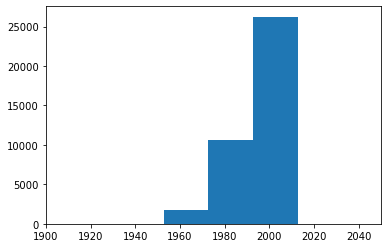

In [41]:
fig, ax = plt.subplots()

ax.hist(trim_data['construction_year'], bins = 100)
ax.set_xlim(1900,2050)

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How will you analyze the data to arrive at an initial approach?
- How will you iterate on your initial approach to make it better?
- What model type is most appropriate, given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any relevant modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?
- What does this final model tell you about the relationship between your inputs and outputs?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [ ]:
# code here to arrive at a baseline prediction

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [ ]:
# code here for your first 'substandard' model

In [ ]:
# code here to evaluate your first 'substandard' model

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [ ]:
# code here to iteratively improve your models

In [ ]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [ ]:
# code here to show your final model

In [ ]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- How could the stakeholder use your model effectively?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
